In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime

In [2]:
data= pd.read_excel('voetbal.xlsx')

In [8]:
start = pd.to_datetime('2011-01-01')
end = pd.to_datetime('2011-12-31')
start_u = start.value//10**9
end_u = end.value//10**9

data['inzet'] = ''
for x, row in data.iterrows():
    y = (pd.to_datetime(np.random.randint(start_u, end_u), unit='s'))
    data.at[x,'geboortedatum'] = datetime.date(y.year,y.month,y.day)
    
    if y < pd.to_datetime('2011-04-01'):
        data.at[x, 'inzet'] = 'zeer goed'
    elif y < pd.to_datetime('2011-10-01'):
        data.at[x, 'inzet'] = 'goed'
    else:
        data.at[x, 'inzet'] = 'matig'
data.head()

,naam,naam.1,positie,aantal gemaakte goalen,geboortedatum,inzet,gewicht,lengte
0,speler1,speler1,staart,1,2011-12-15,matig,25.3,123
1,speler2,speler2,staart,0,2011-05-30,goed,29.2,134
2,speler3,speler3,linkervleugel,1,2011-10-23,matig,22.8,116
3,speler4,speler4,rechtervleugel,0,2011-02-24,zeer goed,23.2,121
4,speler5,speler5,piloot,6,2011-03-02,zeer goed,24.5,121


In [4]:
gewicht_gesorteerd = sorted(set(data.gewicht))

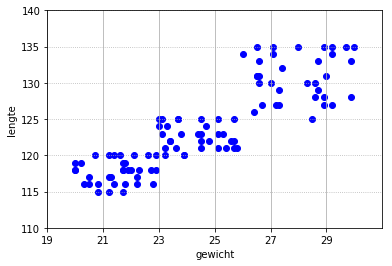

In [6]:
for x in gewicht_gesorteerd:
    y=data[data.gewicht==x]
    plt.scatter(y.gewicht, y.lengte, c='b')
plt.xlim(19,31)
plt.ylim(110,140)
plt.xlabel('gewicht')
plt.ylabel('lengte')
plt.grid(True, axis='x')
plt.grid(True, axis='y', linestyle=':')
plt.xticks(np.arange(19,31,step=2))
plt.show()

In [ ]:
sum_array = {}
for position in data['positie']:
    sum_array[position]=0

cat1= data[pd.to_datetime(data.geboortedatum) < pd.to_datetime('2011-04-01')]
cat2= data[pd.to_datetime('2011-04-01')<=pd.to_datetime(data.geboortedatum) < pd.to_datetime('2011-07-01')]
cat2= data[pd.to_datetime('2011-07-01')<=pd.to_datetime(data.geboortedatum) < pd.to_datetime('2011-10-01')]
cat1= data[pd.to_datetime(data.geboortedatum) >= pd.to_datetime('2011-10-01')]
    
    
for x, row in data.iterrows():
    position=data.at[x, 'positie']
    sum_array[position]=[]
    for category in range(1-5):
        sum_array[position].append(cat1.at[x, 'aantal gemaakte goalen'])
        sum_array[position].append(cat2.at[x, 'aantal gemaakte goalen'])
        sum_array[position].append(cat3.at[x, 'aantal gemaakte goalen'])
        sum_array[position].append(cat4.at[x, 'aantal gemaakte goalen'])
    sum_array[position]=sum_array[position]+ data.at[x, 'aantal gemaakte goalen']


x = list(sum_array.keys())
y = list(sum_array.values())
plt.bar(x,y)
plt.xlabel("Posities")
plt.ylabel("Aantal goals gescoord")
plt.title("Goals per positie")
plt.xticks(list(sum_array.keys()),list(sum_array.keys()), rotation='vertical')
plt.show()

In [9]:
for x in range(1, 5):
    print(x)

1
2
3
4
